In [199]:
import scipy.io
import numpy as np
from IPython.display import Image
from PIL import Image 
import sys 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.extmath import randomized_svd
import matplotlib.image as mpimg

In [143]:
newwidth = 50
newheight = 50

In [366]:
def process(tmp):
    tmp = np.array(tmp).reshape(newheight, newwidth)
    
    # find threshold
    maxlist = []
    minlist = []
    for h in range(newheight):
        maxlist.append(max(tmp[h]))
        minlist.append(min(tmp[h]))
        
    lowthreshold = min(minlist)
    highthreshold = max(maxlist)
               
    # decide whether reverse the colors or not
    margin = []
    margin.append(tmp[0])
    margin.append(tmp[newheight - 1])
    margin.append(tmp[:, 0])
    margin.append(tmp[:, newwidth - 1])
    margin = np.array(margin).flatten()
    
    reverse = False
    if margin.mean() - lowthreshold > highthreshold - margin.mean():
        reverse = True
    
    # make colors more obvious
    
    for h in range(newheight):
        for w in range(newwidth):
            if reverse:
                tmp[h][w] = 1 - tmp[h][w]
                highthresholdtmp = 1 - lowthreshold
                lowthreshold = 1 - highthreshold
                highthreshold = highthresholdtmp
            if tmp[h][w] <= lowthreshold + (highthreshold - lowthreshold) / float(10) * 4.5:
                tmp[h][w] = 0
            if tmp[h][w] >= highthreshold - (highthreshold - lowthreshold) * 0.55:
                tmp[h][w] = 1

    return tmp

def errosion(tmp):
    copy = tmp.copy()
    for i in range(len(tmp)):
        for j in range(len(tmp[0])):
            if copy[i][j] == 0:
                if i > 0 and j > 0 and i < len(tmp) - 1 and j < len(tmp[0]) - 1:
                    tmp[i + 1][j] = 0
                    tmp[i - 1][j] = 0
                    tmp[i][j + 1] = 0
                    tmp[i][j - 1] = 0
                    #tmp[i + 1][j + 1] = 0
                    #tmp[i + 1][j - 1] = 0
                    #tmp[i - 1][j + 1] = 0
                    #tmp[i - 1][j - 1] = 0
    
    return tmp

def swell(tmp):
    copy = tmp.copy()
    for i in range(len(tmp)):
        for j in range(len(tmp[0])):
            if copy[i][j] == 1:
                if i > 0 and j > 0 and i < len(tmp) - 1 and j < len(tmp[0]) - 1:
                    tmp[i + 1][j] = 1
                    tmp[i - 1][j] = 1
                    tmp[i][j + 1] = 1
                    tmp[i][j - 1] = 1
                    #tmp[i + 1][j + 1] = 1
                    #tmp[i + 1][j - 1] = 1
                    #tmp[i - 1][j + 1] = 1
                    #tmp[i - 1][j - 1] = 1
    
    return tmp

def convertFloatToRGB(tmp):
    img = []
    for i in range(len(tmp)):
        col = []
        for j in range(len(tmp[0])):
            pixel = (int(255 - 255 * tmp[i][j]), int(255 - 255 * tmp[i][j]), int(255 - 255 * tmp[i][j]))
            col.append(pixel)
        img.append(col)
        
    img = np.array(img)
    return img

In [367]:
size = [100, 100, 100, 100, 100, 79, 100, 100, 100, 77, 92, 100, 100, 100, 100, 100, 35, 100, 100, 100, 92, 84, 67, 80, 67, 55]

print len(size)

print sum(size)

26
2328


In [371]:
def showimage(tmp):
    _=plt.matshow(tmp.reshape(newheight, newwidth),cmap=plt.cm.gray_r)
    plt.show()

    
def getCoverage(tmp):
    count = 0
    for i in range(len(tmp)):
        for j in range(len(tmp[0])):
            if tmp[i][j] == 1:
                count += 1
    return float(count) / (len(tmp) * len(tmp[0]))

In [378]:
alldata = []

for samplenumber in range(11, 37):
    for imgnumber in range(1, size[samplenumber - 11] + 1):
        filepath = "Img//Sample" + '{0:03}'.format(samplenumber) + " copy//img" + '{0:03}'.format(samplenumber) + "-" + '{0:05}'.format(imgnumber) + ".png"
        im = Image.open(filepath)
        imgsmall = im.resize((newwidth, newheight),Image.ANTIALIAS)
        
        tmp = []
        
        for h in range(0, imgsmall.size[1]): 
            #tmp = []
            for w in range(0, imgsmall.size[0]): 
                pixel = imgsmall.getpixel((w, h))
                tmp.append(1 - float(pixel[0]) / 255)
                 
        tmp = process(tmp)

        if (getCoverage(tmp) < 0.5):
            tmp = swell(tmp)

        if (getCoverage(tmp) > 0.4):
            tmp = errosion(tmp)
        
        while(getCoverage(tmp) < 0.3):
            tmp = swell(tmp)
            
        alldata.append(np.array(tmp).flatten())
        

        im = Image.fromarray(np.uint8((1 - tmp) * 255))
        im.save("Img//Sample" + '{0:03}'.format(samplenumber) + " copy//img" + '{0:03}'.format(samplenumber) + "-" + '{0:05}'.format(imgnumber) +  "copy2.png")
       
        '''
        tmp = convertFloatToRGB(tmp)
        
        for h in range(0, imgsmall.size[1]):
            for w in range(0, imgsmall.size[0]): 
                imgsmall.setpixel(w, h) = tmp[w][h]
            
        imgsmall.show()
        imgsmall.save("Img//Sample" + '{0:03}'.format(samplenumber) + "_color//img" + '{0:03}'.format(samplenumber) + "-" + '{0:05}'.format(imgnumber) +  "copy.png")
        '''
        #_=plt.matshow(tmp.reshape(newheight, newwidth),cmap=plt.cm.gray_r)
        #plt.savefig("Img//Sample" + '{0:03}'.format(samplenumber) + "_color//img" + '{0:03}'.format(samplenumber) + "-" + '{0:05}'.format(imgnumber) +  "copy.png")
        

In [379]:
alldata = np.array(alldata)
print len(alldata)

2328


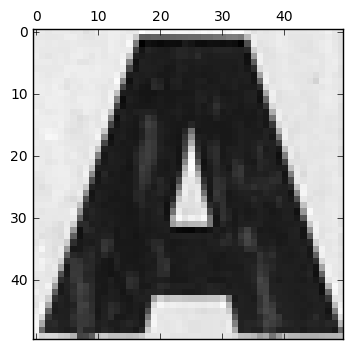

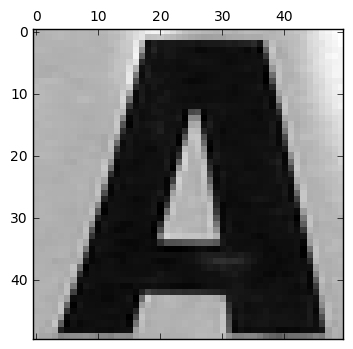

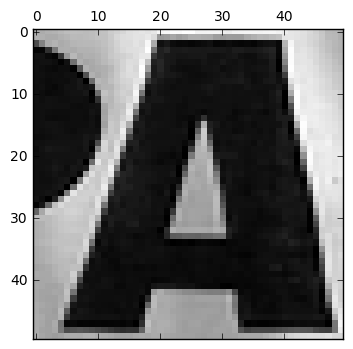

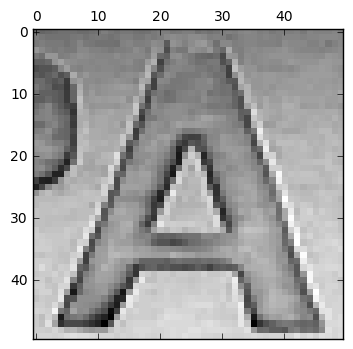

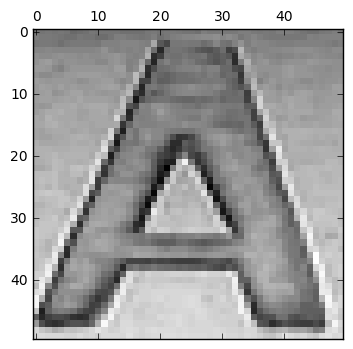

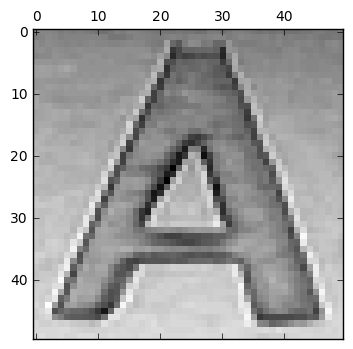

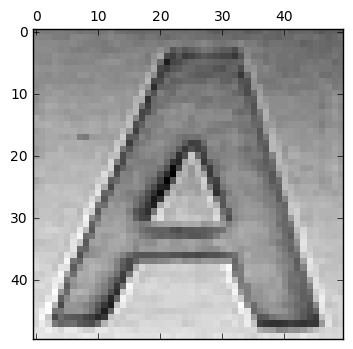

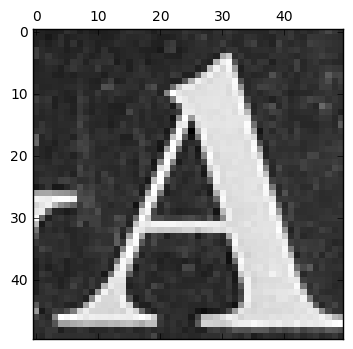

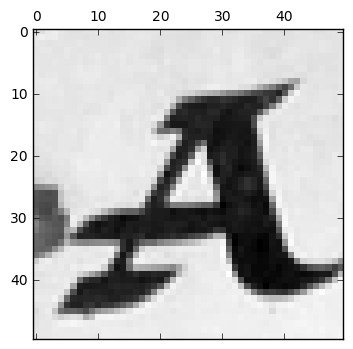

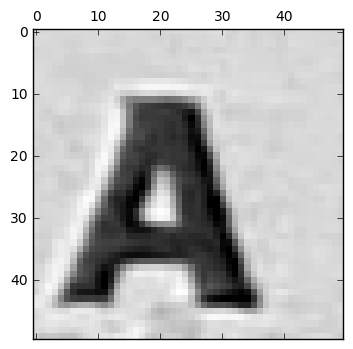

In [124]:
plt.gray() 
plt.rc('axes', grid=False)

for i in range(1, 11):
    _=plt.matshow(alldata[i - 1].reshape(newheight, newwidth),cmap=plt.cm.gray_r)
    plt.show()

In [380]:
label = []

#for i in range(10):
#    label.append(55 * [str(i)])


ch = 'A'
for i in range(26):
    for j in range(size[i]):
        label.append([ch])
    ch = chr(ord(ch) + 1)

label = np.array(label).flatten()


In [381]:
print len(alldata)
print len(label)

alldata = np.array(alldata)

2328
2328


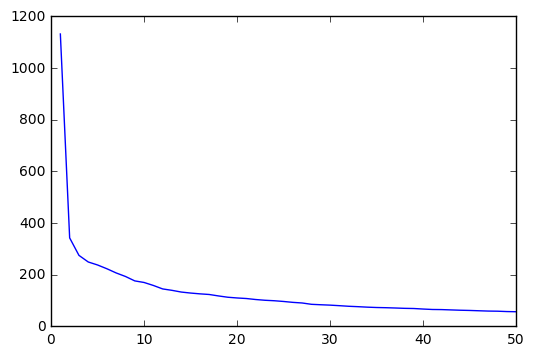

In [382]:
U, Sigma, VT = randomized_svd(alldata, n_components=50,n_iter=5,random_state=None)
plt.xlim([0,50])
plt.plot(range(1,len(Sigma)+1),Sigma)

In [383]:
n_comp_new = 40

pca_new = PCA(n_comp_new)
pca_new.fit(alldata)
resizedata_pca = pca_new.transform(alldata)


def cross(j):
    accuracy = 0
    for i in range(5):
        x_train_resize, x_test_resize, y_train_resize, y_test_resize = train_test_split(resizedata_pca, label, test_size=0.30, random_state=1)

        norm = Normalizer().fit(x_train_resize)           
        x_train_resize = norm.transform(x_train_resize)          
        x_test_resize = norm.transform(x_test_resize)

        neigh = KNeighborsClassifier(n_neighbors = j)
        neigh.fit(x_train_resize, y_train_resize)
        #neigh_predict = neigh.predict(x_test)
        accuracy += neigh.score(x_test_resize, y_test_resize)
    
    return accuracy / float(5)

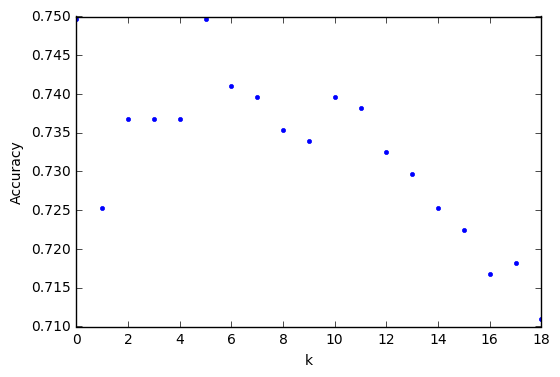

In [384]:
acc = []

for i in range(1, 20):
    acc.append(cross(i))

plt.plot(acc,'.')
plt.xlabel('k')
_=plt.ylabel('Accuracy')
plt.show()

In [385]:
print acc

[0.74964234620886983, 0.72532188841201717, 0.73676680972818309, 0.73676680972818309, 0.73676680972818309, 0.74964234620886983, 0.7410586552217453, 0.7396280400572246, 0.73533619456366239, 0.73390557939914158, 0.7396280400572246, 0.7381974248927039, 0.73247496423462088, 0.72961373390557938, 0.72532188841201717, 0.72246065808297566, 0.71673819742489275, 0.71816881258941345, 0.71101573676680974]


10
20
30
40
50


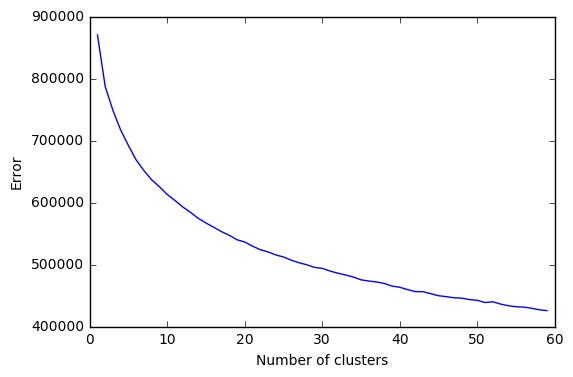

In [390]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

error = np.zeros(60)
for k in range(1,60):
    if k % 10 == 0:
        print k
    kmeanstmp = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeanstmp.fit_predict(resizedata_pca)
    error[k] = kmeanstmp.inertia_
    
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Error')

In [391]:
cluster_num = 30

# do kmeans

x_train, x_test, y_train, y_test = train_test_split(resizedata_pca, label, test_size=0.30, random_state=1)

kmeans = KMeans(n_clusters = cluster_num, init = 'k-means++', max_iter = 100, n_init = 10,random_state = 0)
kmeans.fit(x_train)
k_centers = kmeans.cluster_centers_
k_labels = kmeans.labels_
k_error = kmeans.inertia_
k_predict = kmeans.predict(x_test)

In [392]:
import collections

print collections.Counter(k_labels)

print len(k_labels)
print len(x_test)

Counter({4: 70, 15: 67, 22: 67, 9: 64, 1: 63, 16: 63, 3: 61, 10: 59, 12: 58, 14: 58, 27: 58, 11: 57, 28: 57, 2: 56, 5: 56, 6: 56, 18: 56, 21: 55, 8: 54, 17: 53, 25: 53, 20: 50, 23: 50, 24: 46, 19: 44, 26: 42, 29: 41, 0: 39, 7: 38, 13: 38})
1629
699


In [393]:
# get label

labelbin = []

for i in range(cluster_num):
    labelbin.append([])

print labelbin

labelbin[0].append(1)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [394]:

for i in range(len(x_train)):
    labelbin[k_labels[i]].append(y_train[i])
    

for i in range(cluster_num):
    print "cluster " + str(i + 1)
    print collections.Counter(labelbin[i])


cluster 1
Counter({'V': 33, 'Y': 5, 1: 1, 'W': 1})
cluster 2
Counter({'M': 15, 'P': 9, 'H': 6, 'R': 5, 'W': 5, 'E': 4, 'N': 4, 'Q': 3, 'G': 2, 'K': 2, 'S': 2, 'A': 1, 'D': 1, 'F': 1, 'T': 1, 'V': 1, 'X': 1})
cluster 3
Counter({'S': 14, 'B': 11, 'E': 10, 'G': 7, 'R': 6, 'D': 3, 'Z': 2, 'F': 1, 'Q': 1, 'U': 1})
cluster 4
Counter({'A': 60, 'X': 1})
cluster 5
Counter({'R': 18, 'N': 12, 'M': 10, 'W': 9, 'H': 8, 'K': 3, 'Q': 2, 'P': 2, 'S': 2, 'X': 2, 'B': 1, 'E': 1})
cluster 6
Counter({'T': 39, 'I': 8, 'Z': 4, 'Y': 4, 'X': 1})
cluster 7
Counter({'D': 26, 'U': 8, 'B': 7, 'O': 7, 'G': 4, 'C': 2, 'I': 1, 'H': 1})
cluster 8
Counter({'C': 35, 'Q': 1, 'U': 1, 'G': 1})
cluster 9
Counter({'N': 26, 'H': 15, 'M': 9, 'P': 1, 'U': 1, 'W': 1, 'X': 1})
cluster 10
Counter({'B': 11, 'W': 9, 'U': 7, 'H': 4, 'M': 4, 'V': 4, 'I': 3, 'X': 3, 'K': 2, 'J': 2, 'N': 2, 'Q': 2, 'P': 2, 'Y': 2, 'C': 1, 'E': 1, 'D': 1, 'G': 1, 'R': 1, 'T': 1, 'Z': 1})
cluster 11
Counter({'U': 6, 'X': 6, 'A': 5, 'K': 5, 'F': 4, 'J': 4

In [ ]:
labelname = [ , , , , ,
              , , , , ,
              , , , , ,
              , , , , ,
              , , , , , 
              , , , , , 
              , , , , ,
              , , , , ,
              , , , , ,
              'L', , , , ,]

In [289]:
for i in range(cluster_num):
    print collections.Counter(labelbin[i])

Counter({'T': 78, 'A': 76, 'S': 74, 'C': 73, 'I': 73, 'R': 73, 'P': 72, 'B': 71, 'D': 69, 'H': 68, 'M': 68, 'L': 68, 'E': 67, 'O': 66, 'N': 64, 'K': 62, 'G': 61, 'U': 60, 'F': 58, 'J': 53, 'V': 53, 'W': 49, 'Y': 46, 'X': 46, 'Z': 40, 'Q': 23})
Counter({'T': 78, 'A': 76, 'S': 74, 'C': 73, 'I': 73, 'R': 73, 'P': 72, 'B': 71, 'D': 69, 'H': 68, 'M': 68, 'L': 68, 'E': 67, 'O': 66, 'N': 64, 'K': 62, 'G': 61, 'U': 60, 'F': 58, 'J': 53, 'V': 53, 'W': 49, 'Y': 46, 'X': 46, 'Z': 40, 'Q': 23})
Counter({'T': 78, 'A': 76, 'S': 74, 'C': 73, 'I': 73, 'R': 73, 'P': 72, 'B': 71, 'D': 69, 'H': 68, 'M': 68, 'L': 68, 'E': 67, 'O': 66, 'N': 64, 'K': 62, 'G': 61, 'U': 60, 'F': 58, 'J': 53, 'V': 53, 'W': 49, 'Y': 46, 'X': 46, 'Z': 40, 'Q': 23})
Counter({'T': 78, 'A': 76, 'S': 74, 'C': 73, 'I': 73, 'R': 73, 'P': 72, 'B': 71, 'D': 69, 'H': 68, 'M': 68, 'L': 68, 'E': 67, 'O': 66, 'N': 64, 'K': 62, 'G': 61, 'U': 60, 'F': 58, 'J': 53, 'V': 53, 'W': 49, 'Y': 46, 'X': 46, 'Z': 40, 'Q': 23})
Counter({'T': 78, 'A': 7

In [395]:
numlabel = []

for i in range(len(label)):
    numlabel.append(ord(label[i]) - ord('A'))
    
print len(numlabel)

2328


In [396]:
print len(y_train)
print len(y_test)

1629
699


In [398]:
from sklearn import svm

# svm
x_train, x_test, y_train, y_test = train_test_split(resizedata_pca, numlabel, test_size=0.30, random_state=1)

clf = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr')
clf.fit(x_train, y_train)

y_pred_test = clf.predict(x_test)

print clf.score(x_test, y_test)

0.432045779685
